#이미지가 픽셀 그리드다

In [5]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image shape: (853, 1280, 3)


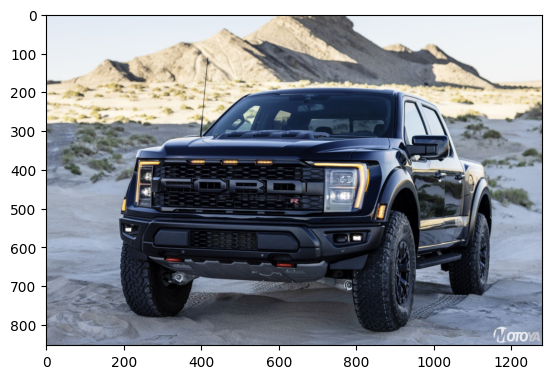

In [12]:
#이미지 표시
image = mpimg.imread('f150.jpg')

#이미지 크기
print('image shape:', image.shape)
plt.imshow(image)
plt.show()

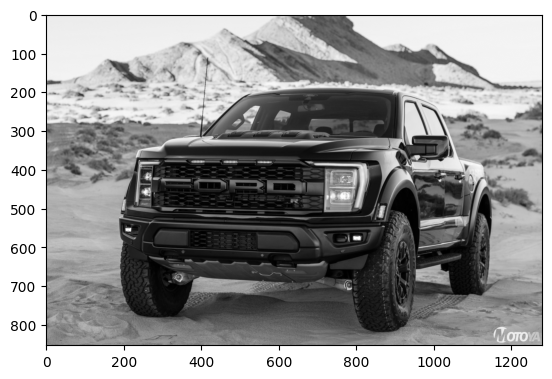

In [ ]:
# grayscale 변환
#opencv는 BGR 순서로 읽어들인다.
#하지만, 우리가 사용하는 matplotlib는 RGB 순서로 읽어들인다.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [14]:
#아무 픽셀 값을 출력합니다
x, y = 100, 100
print('pixel value at (100, 100):', gray[x, y])

#픽셀 값의 범위
print('pixel value range:', gray.min(), 'to', gray.max())

#픽셀 값의 평균과 표준편차
print('pixel value mean:', gray.mean())
print('pixel value std:', gray.std())

pixel value at (100, 100): 241
pixel value range: 0 to 255
pixel value mean: 125.78238661342321
pixel value std: 76.89783306078759


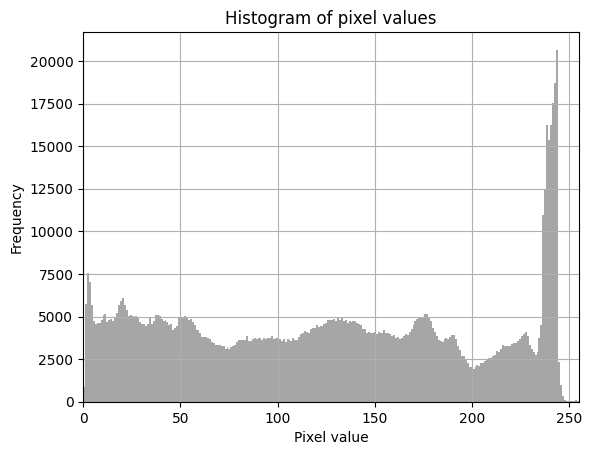

In [15]:
# 픽셀 값의 분포를 히스토그램으로 표시합니다
plt.hist(gray.ravel(), bins=256, range=(gray.min(), gray.max()), color='gray', alpha=0.7)    
plt.title('Histogram of pixel values')
plt.xlabel('Pixel value') 
plt.ylabel('Frequency')
plt.xlim(gray.min(), gray.max())
plt.grid()
plt.show()      

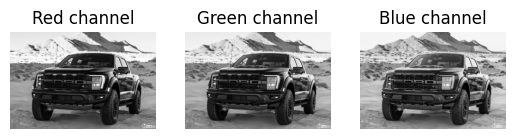

In [16]:
# RGB 채널을 분리합니다.
# r, g, b = cv2.split(image) #간단한방법
r = image[:, :, 0] # BGR 순서로 읽어들인다.
g = image[:, :, 1]
b = image[:, :, 2]

# 각 채널의 시각을 그립니다.
plt.subplot(1, 3, 1) # 행, 열, 위치
plt.imshow(r, cmap='gray')
plt.title('Red channel')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Green channel')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(b, cmap='gray')
plt.title('Blue channel')
plt.axis('off')
plt.show()

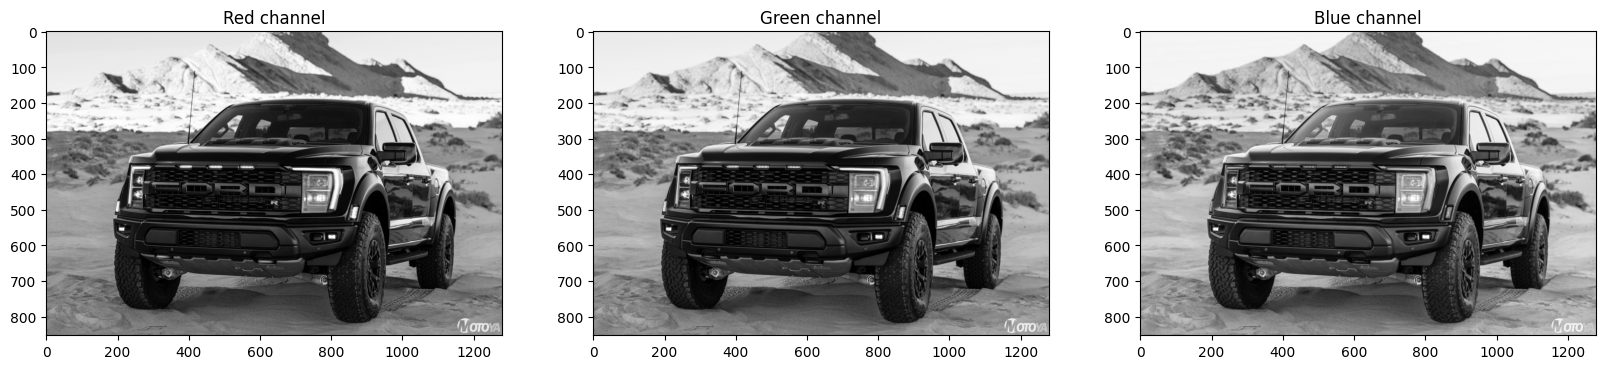

In [21]:
# RGB 채널을 분리합니다.
# r, g, b = cv2.split(image) #간단한방법
r = image[:, :, 0] # BGR 순서로 읽어들인다.
g = image[:, :, 1]
b = image[:, :, 2]

# 각 채널의 시각을 그립니다.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(r, cmap='gray')
ax1.set_title('Red channel')
ax2.imshow(g, cmap='gray')
ax2.set_title('Green channel')
ax3.imshow(b, cmap='gray')
ax3.set_title('Blue channel')
plt.show()

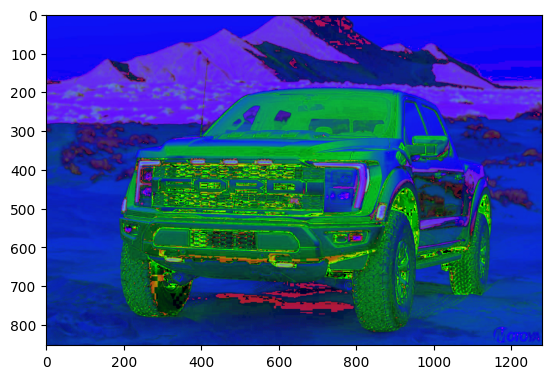

In [18]:
# HSV 색상 공간으로 변환합니다.
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

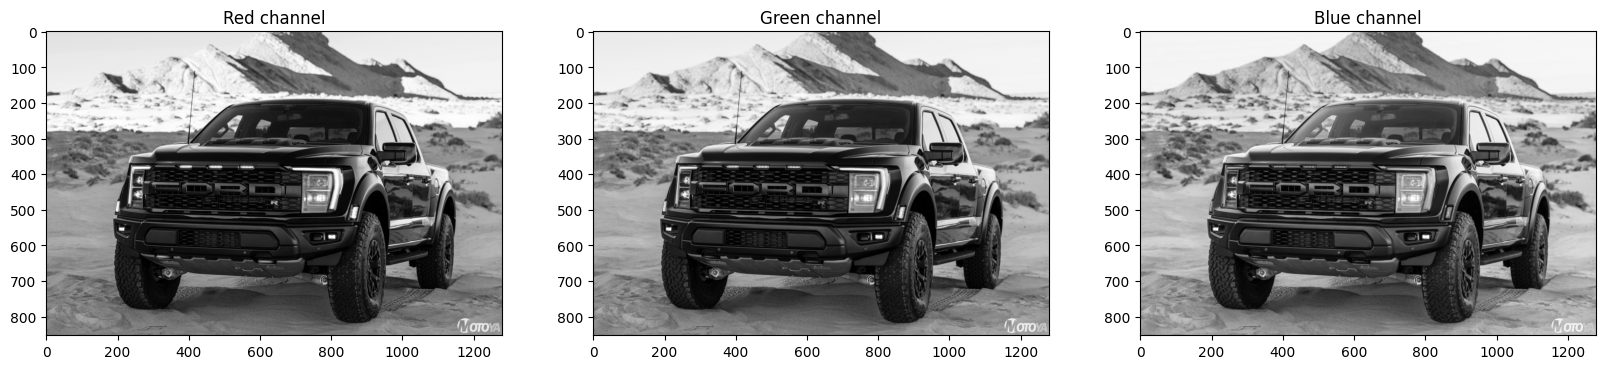

In [22]:
# RGB 채널을 분리합니다.
# r, g, b = cv2.split(image) #간단한방법
h = image[:, :, 0] # BGR 순서로 읽어들인다.
s = image[:, :, 1]
v = image[:, :, 2]

# 각 채널의 시각을 그립니다.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(h, cmap='gray')
ax1.set_title('Red channel')
ax2.imshow(s, cmap='gray')
ax2.set_title('Green channel')
ax3.imshow(v, cmap='gray')
ax3.set_title('Blue channel')
plt.show()

In [25]:
# green screan
green_screen = cv2.imread('green screen car1.jpg')
green_screen = cv2.cvtColor(green_screen, cv2.COLOR_BGR2RGB)


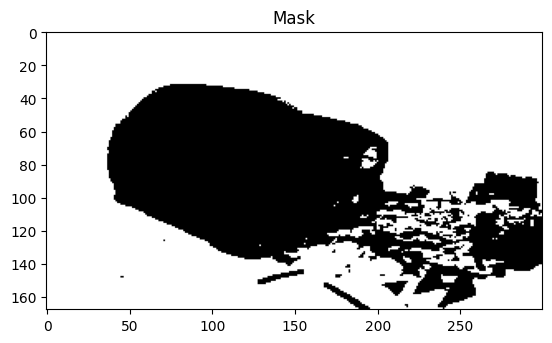

In [24]:
# 임계값 설정
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

# 마스크 생성
mask = cv2.inRange(green_screen, lower_green, upper_green)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

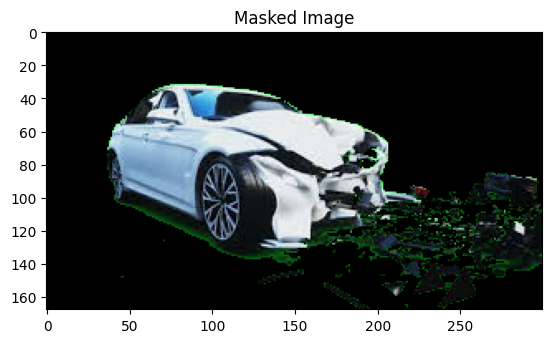

In [28]:
# 마스크 사용하고 배경을 제거합니다.
masked_image = np.copy(green_screen)
masked_image[mask != 0] = [0,0,0] #마스크가 255인 부분을 검정색으로 바꿉니다.
plt.imshow(masked_image)
plt.title('Masked Image')
plt.show()

In [27]:
# 마스크 이미지에서 새로운 배경을 추가합니다.
# background = cv2.imread('background.jpg') #다른 배경이미지가 있을 경우우
background = np.copy(image)

background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background_rgb = cv2.resize(background_rgb, (masked_image.shape[1], masked_image.shape[0])) #크기 조정
masked_image[mask == 0] = background_rgb[mask == 0] #마스크가 0인 부분을 배경으로 바꿉니다.
plt.imshow(masked_image)
plt.title('Masked Image with Background')
plt.show()


NameError: name 'masked_image' is not defined